# Import data

In [1]:
import pandas as pd

In [2]:
df_compare = pd.read_csv('fandango_score_comparison.csv')

In [3]:
df_rate = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [5]:
df_compare.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [7]:
df_rate.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


# Isolate the columns that offer information about Fandango's ratings, before and after Hickey's analysis

In [8]:
df_fan_previous = df_compare[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
df_fan_post = df_rate[['movie', 'year', 'fandango']]
df_fan_previous.head()
df_fan_post.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

## finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular* movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

\**"popular" only if it has 30 fan ratings or more on Fandango's website.*

### check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.

Dataset `'fandango_score_comparison.csv'` columns: 

- `'Fandango_votes'`, 
- `'IMDB_user_vote_count'` and 
- `'Metacritic_user_vote_count'` 

provide the number of vote of movie rating of fandango, IMDB and Metracritic respectively.

min-value of `Fandango_votes` is 35 > 30, see below. Thus, every moive in `'fandango_score_comparison.csv'` is considered as *'popular'*.

In [9]:
df_compare['Fandango_votes'].min()

35

However, dataset `'movie_ratings_16_17.csv'` does not contain information of vote count. In order to verfy the moive popularity, we sample 10 moives from the dataset randomly and manually check it from fandango official website.

In [10]:
df_rate['movie'].sample(10, random_state = 1)

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

As of April 2018, these are the fan ratings we found:

|Movie| Number of fan rating|
|:-:|:-:|
|Mechanic: Resurrection	|2247|
|Warcraft	|7271|
|Max Steel	|493|
|Me Before You	|5263|
|Fantastic Beasts and Where to Find Them	|13400|
|Cell	|17|
|Genius	|127|
|Sully	|11877|
|A Hologram for the King	|500|
|Captain America: Civil War	|35057|

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Let's also double-check the other data set for popular movies. The documentation states clearly that there're only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here.

# Isolate the movies released in 2015 and 2016 in 2 separate data set respectively.

In [11]:
# year of release is attached with the moive name, take them out and store them in a new column: Year.
df_fan_previous['year'] = df_fan_previous['FILM'].str[-5:-1].astype(int)
df_fan_previous.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
print(df_fan_previous['year'].value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(x * 100)))
print(df_fan_post['year'].value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(x * 100)))

2015    88.36%
2014    11.64%
Name: year, dtype: object
2016    89.25%
2017    10.75%
Name: year, dtype: object


Almost 90% of the movies before and after hickey's analysis releases in 2015, 2016 respectively, dropping the rest of the years won't cost significant in observation.

In [13]:
df_fan_2015 = df_fan_previous[df_fan_previous['year'] == 2015]
df_fan_2016 = df_fan_post[df_fan_post['year'] == 2016]

print(df_fan_2015['year'].value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(x * 100)))
print(df_fan_2016['year'].value_counts(normalize = True).apply(lambda x: "{0:.2f}%".format(x * 100)))
print('\n')
print('#row remains in df_fan_previous: {}'.format(df_fan_2015.shape[0]))
print('#row remains in df_fan_post: {}'.format(df_fan_2016.shape[0]))

2015    100.00%
Name: year, dtype: object
2016    100.00%
Name: year, dtype: object


#row remains in df_fan_previous: 129
#row remains in df_fan_post: 191


# Comparing Distribution Shapes for 2015 and 2016
Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample.

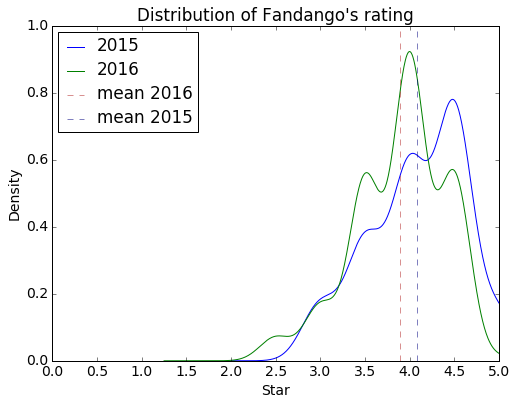

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

df_fan_2015['Fandango_Stars'].plot.kde(label = '2015',
                                       legend = True, 
                                       figsize = (8,6),
                                       title = "Distribution of Fandango's rating")
df_fan_2016['fandango'].plot.kde(label = '2016',
                                 legend = True)
plt.axvline(df_fan_2016['fandango'].mean(), 
            label = 'mean 2016',
            linestyle = '--', 
            alpha = .5,
            c = 'firebrick')
plt.axvline(df_fan_2015['Fandango_Stars'].mean(),
            label = 'mean 2015', 
            linestyle = '--', 
            alpha = .5,
            c = 'navy')
plt.legend(loc = 'best')
plt.xlabel ('Star')
plt.xticks(np.arange(0, 5.1, 0.5))
plt.xlim(0,5)
plt.style.use('fivethirtyeight')

## Preliminary Analysis
Both distribution are left (negatively) skewed, rating below 2.0 is unlikely in both distribution. 

However, there is a 0.5 rating drop of the most frequent rating from 2015 to 2016. In 2015 most frequent rating is 4.5 while this frequence decreaes in 2016 to about 4.0. In 2016 over 80% of the rate is 4.0. Similar direction is seen in mean of both years.  In other words, movies in 2016 are ralatively lower than 2015, but it is not sure if it is because of Hickey's analysis.

## Examine the frequency distribution tables of the two distributions.

### Normalised frequency table of Fandango Rating in 2015

In [15]:
df_fan_2015['Fandango_Stars'].value_counts(normalize = True).sort_index().apply(lambda x: "{0:.2f}%".format(x * 100))

3.0     8.53%
3.5    17.83%
4.0    28.68%
4.5    37.98%
5.0     6.98%
Name: Fandango_Stars, dtype: object

### Normalised frequency table of Fandango Rating in 2016

In [16]:
df_fan_2016['fandango'].value_counts(normalize = True).sort_index().apply(lambda x: "{0:.2f}%".format(x * 100))

2.5     3.14%
3.0     7.33%
3.5    24.08%
4.0    40.31%
4.5    24.61%
5.0     0.52%
Name: fandango, dtype: object

The direction is still clear in the normalised frequency table that the most frequent rating drops from 4.5 to 4.0 from 2015 to 2016. Moreover, in 2016 the range of rating becomes larger than 2015. In 2015, there is no rating below 3 and there is about 7% of 5-stars-rating while in 2016 there is a tiny proportion consumed by the newly appeared 2.5-star-rating and 5-star-rating significantly drops to about 0.5% from about 7%.

### Summary Statistic

In [22]:
summary = pd.DataFrame()

# df_fan_2015['year'].unique()[0]
for df, col in zip([df_fan_2015, df_fan_2016], ['Fandango_Stars','fandango']):
    summary[df['year'].unique()[0]] = [df[col].mean(), df[col].median(), df[col].mode()[0]]
summary.index = ['mean', 'median','mode']
summary['% changed from 2015']=((summary[2016]-summary[2015])/summary[2015])*100
summary.round(2)

,2015,2016,% changed from 2015
mean,4.09,3.89,-4.84
median,4.00,4.00,0.00
mode,4.50,4.00,-11.11


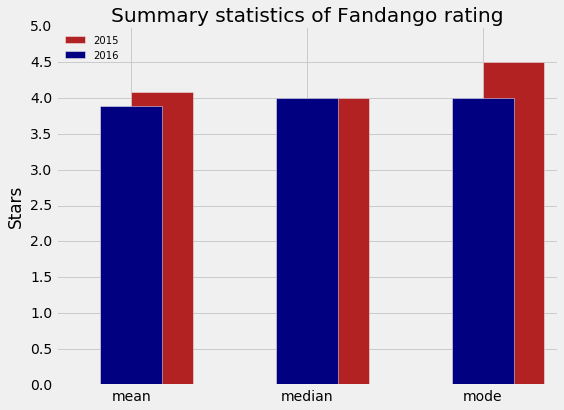

In [18]:
summary[2015].plot.bar(label = '2015', legend = True, color = 'firebrick', width = .35, rot = 0, align = 'edge', figsize = (8,6))
summary[2016].plot.bar(label = '2016', legend = True, color = 'navy', width = .35, rot = 0)
plt.legend(loc = 'best', prop = {'size': 10}, framealpha = 0)
plt.ylim(0,5)
plt.ylabel('Stars')
plt.yticks(np.arange(0,5.1,.5))
plt.title('Summary statistics of Fandango rating')

the above summary bar chart and table shows that, from 2015 to 2016, while the median keeps constant, the mean and mode of the fandango rating are dropped. Mean drops about 5%, from 4.09 to 3.89 , and Mode drops from 4.5 to 4.
Suppose everything constant but only fandango fixing the bug of rounding up the rating, it actually is a big change in terms of the rating point the distribution of the rating is changed immediately after the fix, showing that there is a lot of distortion in the 2015 rating.

However, we still cannot be sure that if it is because of the Hickey's analysis without further assumption and investigation.